<a href="https://colab.research.google.com/github/Abhishek9124/Generative-AI/blob/main/Document_and_Image_Understanding_Capability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEP 1: Install the Google Generative AI SDK
!pip install -q google-generativeai

In [ ]:
import os
os.environ["GOOGLE_API_KEY"] = ""


# DOCUMENT UNDERSTANDING


In [ ]:
from google import genai
from google.genai import types
import httpx

client = genai.Client()

# document URL
doc_url = "https://www.ril.com/sites/default/files/2025-08/RIL-Integrated-Annual-Report-2024-25.pdf"

doc_data = httpx.get(doc_url).content

prompt="IN page number 5  there is an table  and content written on the right side of the table,is the content  and table related to each other."

response= client.models.generate_content(
    model= "gemini-2.5-flash",
    contents= [
        types.Part.from_bytes(
            data=doc_data,
            mime_type="application/pdf"
        ), prompt
    ])

In [ ]:
print(response.text)

Yes, on page 5, the content written on the right side of the table is directly related to the table itself.

The large table on the left is titled "10-YEAR FINANCIAL HIGHLIGHTS" and presents a detailed breakdown of financial figures (like Revenue, EBDIT, Net Profit, etc.) over several fiscal years.

The text on the right, under "Financial Performance and Review," provides a narrative summary and analysis of these financial highlights. For example, it mentions that "Consolidated revenue increased by 7.1% to J10,71,174 crore (US$ 125.3 billion), compared to J10,00,122 crore in FY 2023-24," which are figures directly found in the "Value of Sales and Services (Revenue)" row of the table.

So, the content provides an interpretation and summary of the data presented in the table.


In [ ]:
from google import genai
from google.genai import types
import pathlib

client = genai.Client()

filepath= pathlib.Path("/content/DISSERTATION.pdf")

prompt="Summarize this document"

response= client.models.generate_content(
    model= "gemini-2.5-flash",
    contents= [
        types.Part.from_bytes(
            data=filepath.read_bytes(),
            mime_type="application/pdf"
        ), prompt
    ])

print(response.text)

This document outlines a research study titled "CHAPTER NO-1 INTRODUCTION" (and subsequently includes Literature Review, Methodology, Analysis, and Findings). The study aims to perform a multi-factorial analysis of cancer patient outcomes, focusing on the combined influence of genetic, lifestyle, environmental, and economic determinants on cancer severity, treatment costs, and survival years.

Here's a summary of the document's key aspects:

**1. Introduction & Objectives:**
*   Cancer is presented as a complex, global health challenge with rising incidence and significant socio-economic burden.
*   The study addresses a critical gap in cancer research by adopting an integrated, multifactorial approach, analyzing data from 2015-2024.
*   **General Objective:** To analyze cancer patient outcomes by investigating genetic, lifestyle, environmental, and economic factors on severity, costs, and survival.
*   **Specific Objectives:** Identify severity/survival predictors, evaluate economic b

In [ ]:
response

GenerateContentResponse(
  automatic_function_calling_history=[],
  candidates=[
    Candidate(
      content=Content(
        parts=[
          Part(
            text="""This document outlines a research study titled "CHAPTER NO-1 INTRODUCTION" (and subsequently includes Literature Review, Methodology, Analysis, and Findings). The study aims to perform a multi-factorial analysis of cancer patient outcomes, focusing on the combined influence of genetic, lifestyle, environmental, and economic determinants on cancer severity, treatment costs, and survival years.

Here's a summary of the document's key aspects:

**1. Introduction & Objectives:**
*   Cancer is presented as a complex, global health challenge with rising incidence and significant socio-economic burden.
*   The study addresses a critical gap in cancer research by adopting an integrated, multifactorial approach, analyzing data from 2015-2024.
*   **General Objective:** To analyze cancer patient outcomes by investigating geneti

In [ ]:
prompt = """
From the early-stage diagnosis percentages for different cancer types, identify the type with the lowest early-stage detection rate.
Then, using the literature review, explain at least two environmental or behavioral factors that could contribute to this lower detection.
"""

response= client.models.generate_content(
    model= "gemini-2.5-flash",
    contents= [
        types.Part.from_bytes(
            data=filepath.read_bytes(),
            mime_type="application/pdf"
        ), prompt
    ])

print(response.text)

Based on the provided text:

1.  **Lowest Early-Stage Detection Rate:**
    From section **4.2.2 Proportion of Early-Stage Diagnoses by Cancer Type and** on page 27, the cancer type with the lowest early-stage detection rate (Stage 0 and Stage I) is **Lung Cancer at 38.43%**.

2.  **Environmental or Behavioral Factors Contributing to Lower Detection:**

    Using the literature review (Chapter 2), two significant factors that contribute to lung cancer and could subsequently lead to lower early detection are:

    *   **Smoking (Behavioral Factor):**
        *   **Contribution to Lung Cancer:** As stated in section **2.3 Lifestyle and Behavioral Factors** (page 10), smoking is "Responsible for ~22% of cancer deaths globally. Strongly linked to lung, throat, bladder, and pancreatic cancers."
        *   **Contribution to Lower Early Detection:** Individuals who smoke often develop chronic respiratory conditions like chronic cough, bronchitis, or emphysema. The early symptoms of lung canc

In [ ]:
from google import genai
from google.genai import types
import pathlib

client = genai.Client()

# File paths for both strategies
strategy1_path = pathlib.Path('/content/Streategy 1.pdf')
strategy2_path = pathlib.Path('/content/Streategy 2.pdf')

#prompt = "Tell me the difference between both the strategies"
prompt = "Tell me the similarity between both the strategies"

# Generate content with both PDFs passed as separate inputs
response = client.models.generate_content(
    model="gemini-2.5-flash",
    contents=[
        types.Part.from_bytes(
            data=strategy1_path.read_bytes(),
            mime_type='application/pdf'
        ),
        types.Part.from_bytes(
            data=strategy2_path.read_bytes(),
            mime_type='application/pdf'
        ),
        prompt
    ]
)

print(response.text)

Both "Growth Through Product-Led Strategy (PLG)" and "Growth Through Strategic Partnerships" are **growth strategies that aim to achieve scalable customer acquisition and business expansion by leveraging existing assets or intrinsic qualities, rather than solely relying on heavy, traditional outbound sales or marketing spend.**

Here's a breakdown of the similarities:

1.  **Efficiency and Scalability:**
    *   **PLG:** Seeks to scale by making the product itself the primary driver of acquisition, conversion, and expansion. It relies on the product's inherent value and ease of use to attract and retain users, often with viral loops amplifying reach.
    *   **Strategic Partnerships:** Seeks to scale by tapping into the existing audience, credibility, and resources of another entity, avoiding the need to build those from scratch.
    *   **Similarity:** Both aim for a "multiplier effect" to grow more efficiently than traditional methods, using an existing base (the product's inherent a

# IMAGE UNDERSTANDING


In [ ]:
# Gemini models are built to be multimodal from the ground up, unlocking a wide range of image processing and computer vision tasks,
# without having to train specialized ML models.


# Think of it like giving the AI eyes ‚Äî it can look at a picture and:
#       Describe it in words (image captioning)
#       Answer questions about it (visual Q&A)
#       Find & locate objects, image labelling.
#       Read text in images (OCR)
#       Compare images (find differences, similarities)
#       Extract data (like reading numbers, charts, forms)

In [ ]:
#  Describe it in words
from google import genai
from google.genai import types
from PIL import Image


client = genai.Client()


image = Image.open("/content/cat_dog_image.png")

prompt ="Give me an caption for the image"

response= client.models.generate_content(
    model= "gemini-2.5-flash",
    contents=[image, prompt]
    )

print(response.text)

Here are a few caption options for the image, ranging from simple to more descriptive:

**Short & Sweet:**
*   Pet pals.
*   A friendly duo.
*   Cute companions.
*   Cat and dog.
*   Best friends forever.

**Descriptive:**
*   An adorable cartoon illustration of an orange tabby cat and a light brown dog sitting side-by-side.
*   Two happy pets, a cat and a dog, captured in a charming, simple style.
*   A heartwarming image of a contented cat and dog looking out.

**Whimsical/Playful:**
*   Double the cuteness!
*   Just two buddies hanging out.
*   Who could resist these happy faces?

**Social Media Ready:**
*   Purr-fectly pawsome friends! üêæ‚ù§Ô∏è #CatAndDog #PetPals #CuteAnimals
*   Happiness is a cat and dog side-by-side. üòä #AnimalFriends #AdorabPets
*   The ultimate duo! What's your favorite pet combo? üëá #PetsOfInstagram #CutePets

Choose the one that best fits the context where you'll be using it!


In [ ]:
#   Answer questions about it (visual Q&A)
client = genai.Client()


image = Image.open("/content/cat_dog_image.png")
image2=  Image.open("/content/cat_dog.png")
prompt ="Which color is dog's collar"

response= client.models.generate_content(
    model= "gemini-2.5-flash",
    contents=[image2, prompt]
    )

print(response.text)

Based on the images provided, the dog does not appear to be wearing a collar.


In [ ]:
#  Read text in images (OCR)
client = genai.Client()


image = Image.open("/content/cat_dog_image.png")
image2=  Image.open("/content/cat_dog.png")
prompt ="Read all the text written in the image."

response= client.models.generate_content(
    model= "gemini-2.5-flash",
    contents=[image, prompt]
    )

print(response.text)

I have carefully examined the original image and all the provided crops. There is **no text written** in any of the images. They depict cartoon illustrations of a cat and a dog.


In [ ]:
#       Compare images (find differences, similarities)

image = Image.open("/content/cat_dog_image.png")
image2=  Image.open("/content/cat_dog.png")
prompt ="What is the difference between both the images."

response= client.models.generate_content(
    model= "gemini-2.5-flash",
    contents=[image, image2, prompt]
    )

print(response.text)

The primary differences between the two images are in their **artistic style** and **level of realism**.

1.  **Artistic Style/Realism:**
    *   **Image 1:** Depicts a cat and a dog in a **cartoonish, simplified, and illustrative style**. They have clear outlines, flat colors, and stylized, friendly expressions. It's not meant to be realistic.
    *   **Image 2:** Shows a cat and a dog in a **highly realistic, photographic style**. They are detailed, with visible fur texture, realistic eyes, and natural, unsmiling expressions, resembling a real photo.

2.  **Level of Detail:**
    *   **Image 1:** Lacks intricate details, focusing on basic shapes and features.
    *   **Image 2:** Rich in detail, showcasing individual hairs, whiskers, and realistic textures.

3.  **Text:**
    *   **Image 1:** Contains no text.
    *   **Image 2:** Includes the text "CAT AND DOG" prominently displayed at the top.

4.  **Composition/Framing:**
    *   **Image 1:** Shows the full bodies of both animals 

In [ ]:
#       Find & locate objects, image labelling.

In [ ]:
#  Read text in images (OCR)
client = genai.Client()
image2=  Image.open("/content/cat_dog.png")
W,H= image2.size
prompt ="""Find all  main objects  in the image,
           For each object , return JSON:
           {"label":".....","box_2d":[ymin, xmin, ymax, xmax]}scaled to 0-1000
     """

response= client.models.generate_content(
    model= "gemini-2.5-flash",
    contents=[image2, prompt],
    config={"response_mime_type":"application/json"}
    )

print(response.text)

[
  {"label": "CAT", "box_2d": [238, 0, 1000, 477]},
  {"label": "DOG", "box_2d": [234, 437, 1000, 1000]},
  {"label": "CAT AND DOG", "box_2d": [46, 120, 195, 903]}
]


In [ ]:
import json
from IPython.display  import display

object = json.loads(response.text)

In [ ]:
from PIL import Image, ImageDraw, ImageFont
draw= ImageDraw.Draw(image2) # add canvas
font= ImageFont.load_default() # add labels

In [ ]:
object

[{'label': 'CAT', 'box_2d': [238, 0, 1000, 477]},
 {'label': 'DOG', 'box_2d': [234, 437, 1000, 1000]},
 {'label': 'CAT AND DOG', 'box_2d': [46, 120, 195, 903]}]

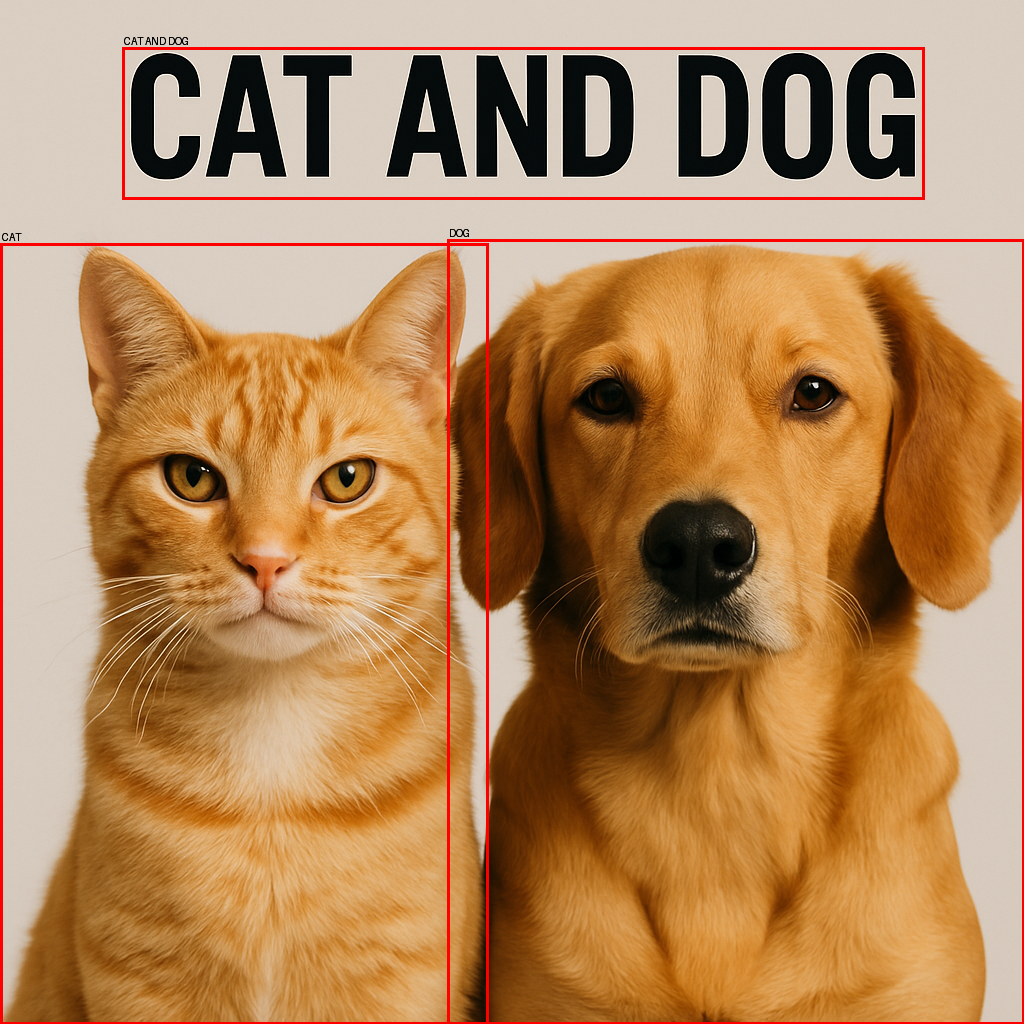

In [ ]:
for obj in object:
  label= obj["label"]
  ymin, xmin, ymax, xmax = obj["box_2d"]

  x1, y1 = int(xmin / 1000 * W), int(ymin / 1000 * H)
  x2, y2 = int(xmax / 1000 * W), int(ymax / 1000 * H)

  # draw rectangle
  draw.rectangle([x1,y1,x2,y2], outline="Red", width=3)


  #label
  draw.text((x1 + 2, y1 - th - 2), label, fill="black", font=font)



display(image2)